In [48]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import fuzzywuzzy
from fuzzywuzzy import process
%matplotlib inline
import missingno

In [49]:
df = pd.read_csv("top50.csv", encoding='cp1252')
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [50]:
df.columns


Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [51]:
df.shape

(50, 14)

In [52]:
df.describe()

,Unnamed: 0,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
count,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,25.50000,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000,87.500000
std,14.57738,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596,4.491489
min,1.00000,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000,70.000000
25%,13.25000,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000,86.000000
50%,25.50000,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000,88.000000
75%,37.75000,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000,90.750000
max,50.00000,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000,95.000000


In [53]:
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


# Identify the data types of columns

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
Unnamed: 0          50 non-null int64
Track.Name          50 non-null object
Artist.Name         50 non-null object
Genre               50 non-null object
Beats.Per.Minute    50 non-null int64
Energy              50 non-null int64
Danceability        50 non-null int64
Loudness..dB..      50 non-null int64
Liveness            50 non-null int64
Valence.            50 non-null int64
Length.             50 non-null int64
Acousticness..      50 non-null int64
Speechiness.        50 non-null int64
Popularity          50 non-null int64
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [55]:
df.select_dtypes(exclude = object).columns

Index(['Unnamed: 0', 'Beats.Per.Minute', 'Energy', 'Danceability',
       'Loudness..dB..', 'Liveness', 'Valence.', 'Length.', 'Acousticness..',
       'Speechiness.', 'Popularity'],
      dtype='object')

In [56]:
df.select_dtypes(include = object).columns

Index(['Track.Name', 'Artist.Name', 'Genre'], dtype='object')

# Check for Missing Data

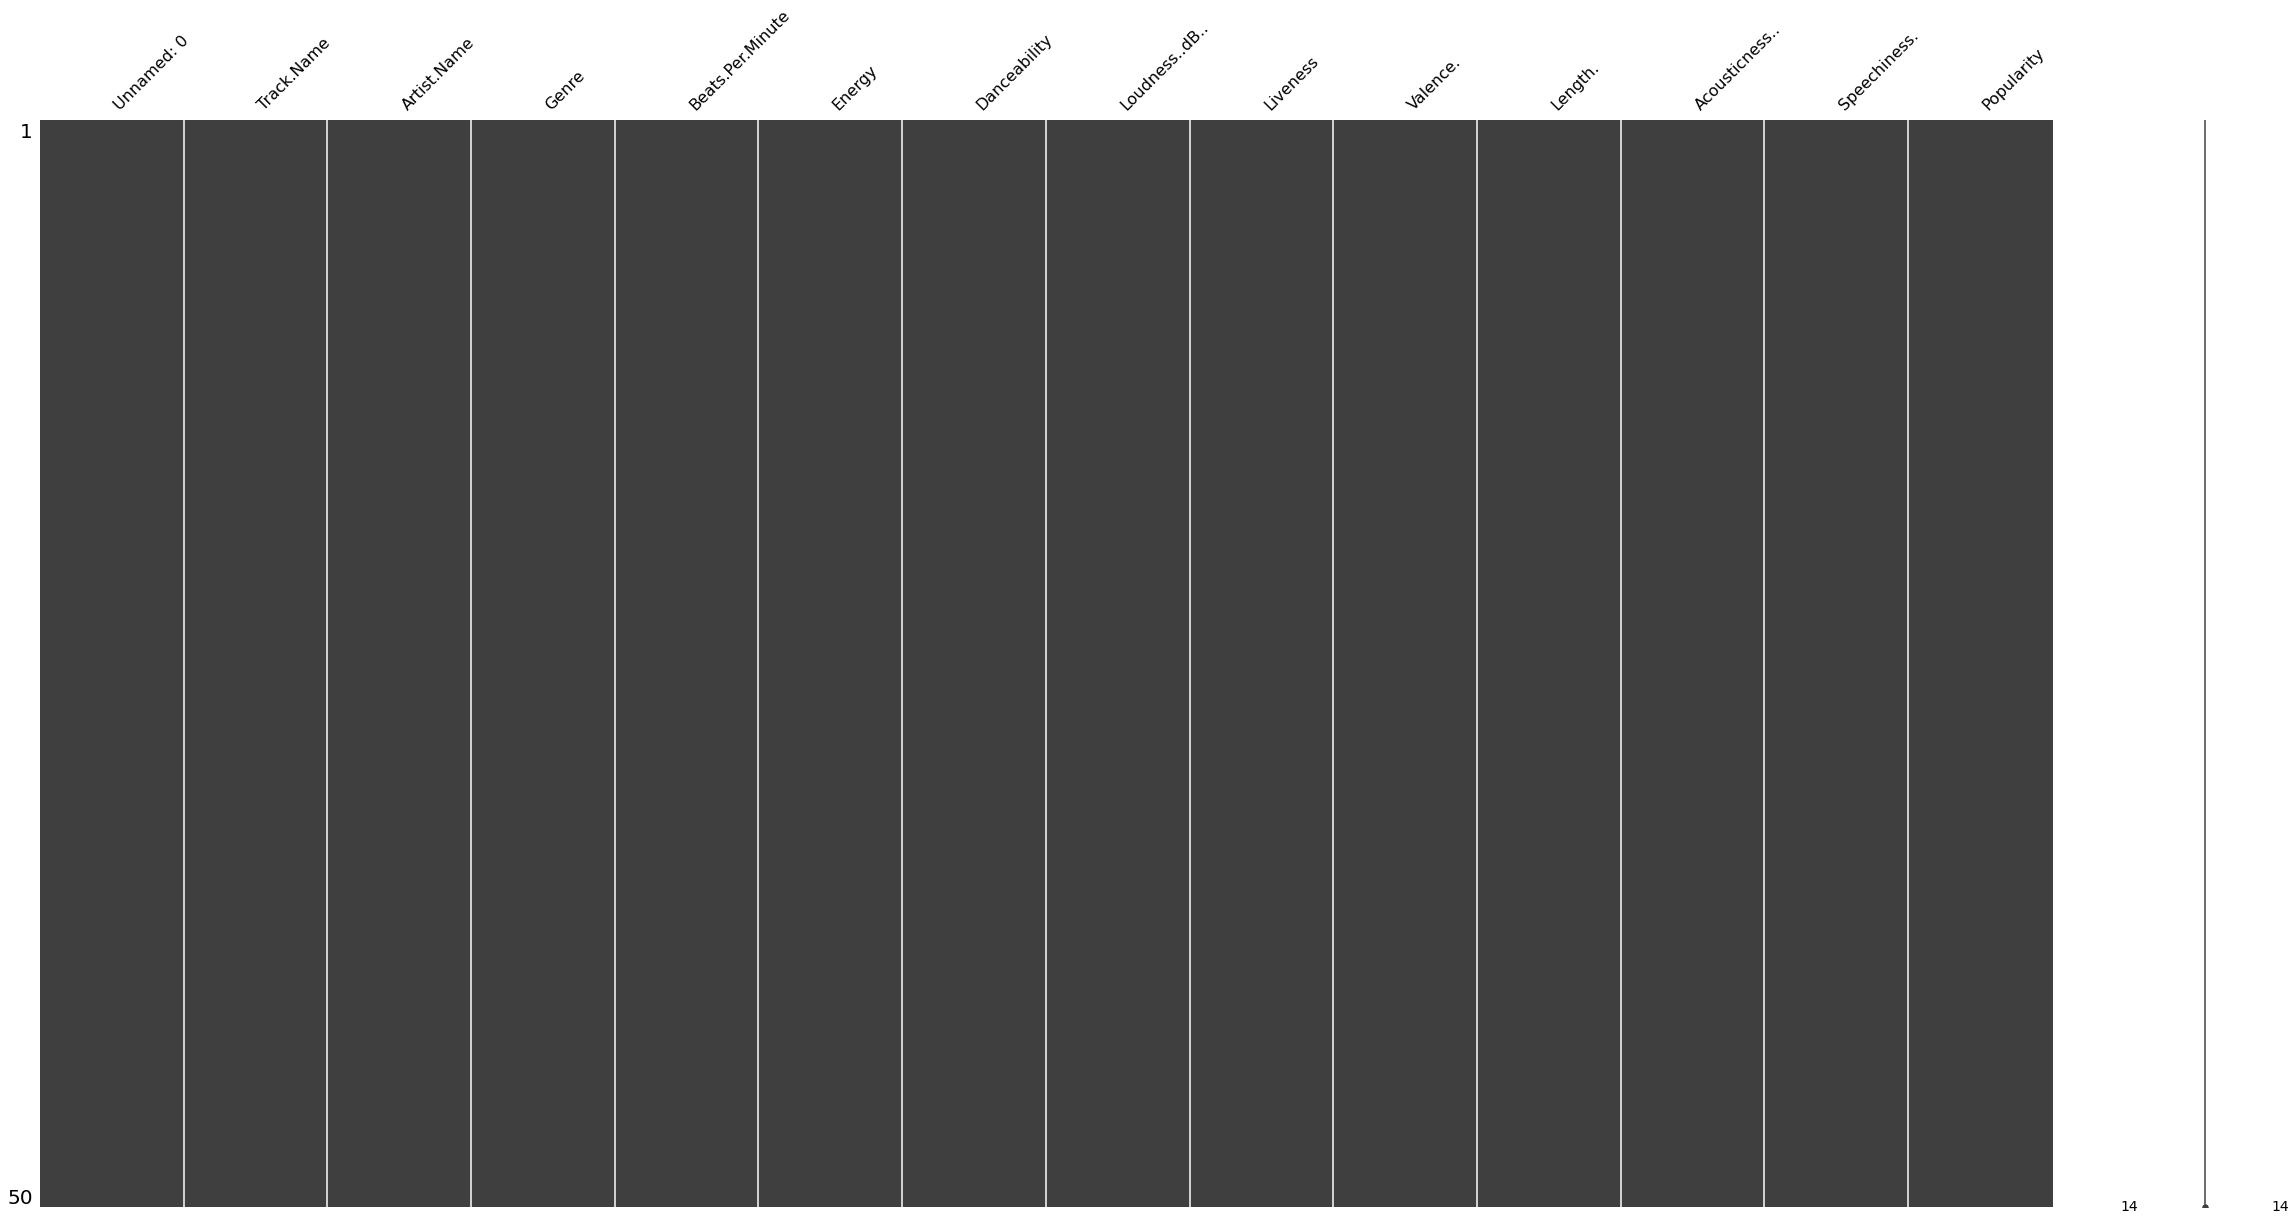

In [57]:
missingno.matrix(df, figsize = (40,20))

# Changing Column Name

Changing the first column name to Rank

In [58]:
df = df.rename(columns = {'Unnamed: 0': "Rank"})
df.columns

Index(['Rank', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

# Unique Values

In [59]:
# checking for unique values and total number in columns 

for col in df.columns:
    print('{} : {}'.format(col,df[col].unique())) 
    print(f"\n {len(df[col].unique())}\n")
    

Rank : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]

 50

Track.Name : ['Señorita' 'China' 'boyfriend (with Social House)'
 'Beautiful People (feat. Khalid)' 'Goodbyes (Feat. Young Thug)'
 "I Don't Care (with Justin Bieber)" 'Ransom' 'How Do You Sleep?'
 'Old Town Road - Remix' 'bad guy' 'Callaita'
 'Loco Contigo (feat. J. Balvin & Tyga)' 'Someone You Loved'
 'Otro Trago - Remix' 'Money In The Grave (Drake ft. Rick Ross)'
 'No Guidance (feat. Drake)' 'LA CANCIÓN'
 'Sunflower - Spider-Man: Into the Spider-Verse' 'Lalala' 'Truth Hurts'
 'Piece Of Your Heart' 'Panini' 'No Me Conoce - Remix' 'Soltera - Remix'
 'bad guy (with Justin Bieber)' "If I Can't Have You" 'Dance Monkey'
 "It's You" 'Con Calma' 'QUE PRETENDES' 'Takeaway' '7 rings'
 '0.958333333333333' 'The London (feat. J. Cole & Travis Scott)'
 'Never Really Over'
 'Summer Days (feat. Macklemore & Patrick Stump of Fall Out Bo

# Check for duplicates

In [60]:
df.drop_duplicates(keep = 'first')
df.shape

(50, 14)

# Total Count of genres

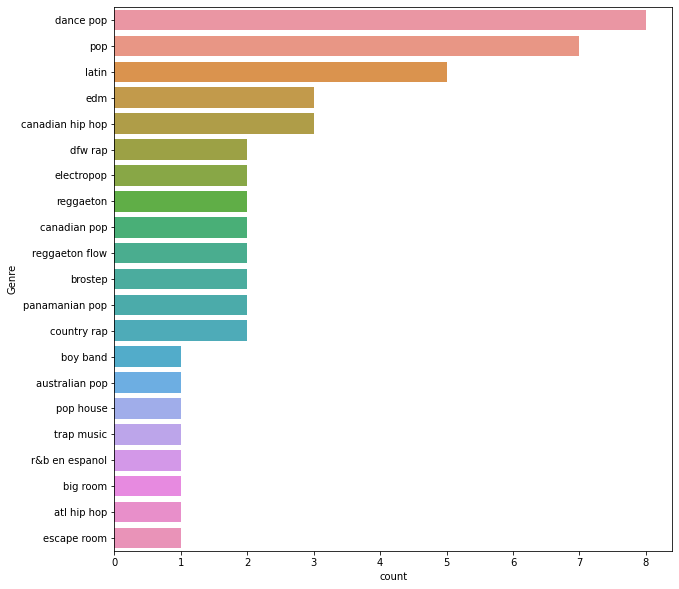

In [61]:
plt.figure(figsize = (10,10))

#Ordering from largest to smallest
order = df['Genre'].value_counts().index

sns.countplot(data = df, y = "Genre", order = order)


# Distribution of Genre along song Rank

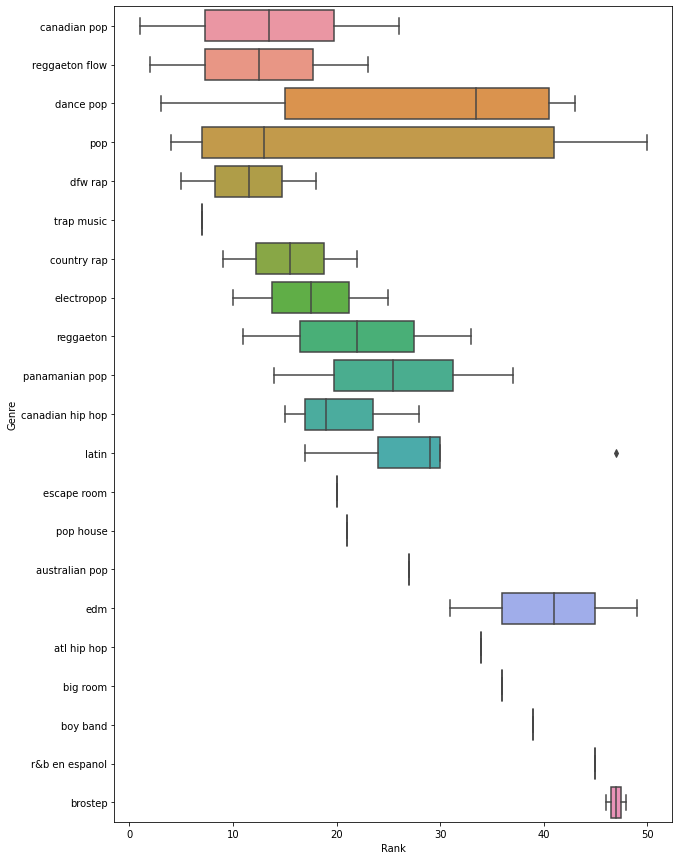

In [62]:

plt.figure(figsize = (10,15))
sns.boxplot(data = df, y = "Genre", x = "Rank")

# Correlation between Rank and quantitative values

<Figure size 1440x1440 with 0 Axes>

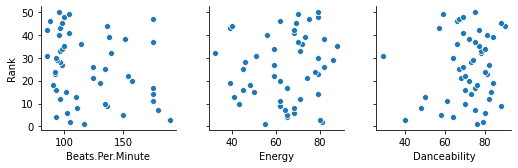

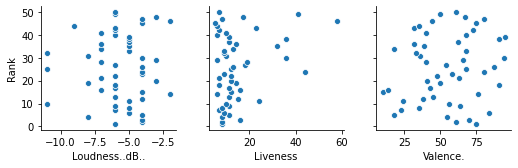

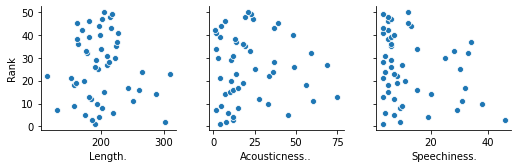

In [63]:
plt.figure(figsize = (20,20))

sns.pairplot(df, x_vars = ['Beats.Per.Minute', 'Energy', 'Danceability'] , y_vars = ["Rank"])

sns.pairplot(df, x_vars = ['Loudness..dB..','Liveness', 'Valence.'] , y_vars = ["Rank"])

sns.pairplot(df, x_vars = [
'Length.', 'Acousticness..', 'Speechiness.'] , y_vars = ["Rank"])


# Distribution of the Quantitative Values 

In [1]:
sns.set()
plt.figure(figsize = (16,10))

#3x3 subplot graph
fig, axes = plt.subplots(3, 3, figsize=(10,12))

sns.distplot(df["Acousticness.."], ax=axes[0,0])
sns.distplot(df["Danceability"], ax=axes[0,1])
sns.distplot(df["Liveness"], ax=axes[0,2])
sns.distplot(df["Speechiness."], ax=axes[1,0])
sns.distplot(df["Energy"], bins = 7, ax=axes[1,1])
sns.distplot(df["Length."], bins = 7, ax=axes[1,2])
sns.distplot(df["Loudness..dB.."], bins = 7, ax=axes[2,0])
sns.distplot(df["Beats.Per.Minute"], bins = 8, ax=axes[2,1])
sns.distplot(df["Valence."], bins = 7, ax=axes[2,2])

plt.savefig("output.png")

NameError: name 'sns' is not defined

# Correlation between Quantitative values

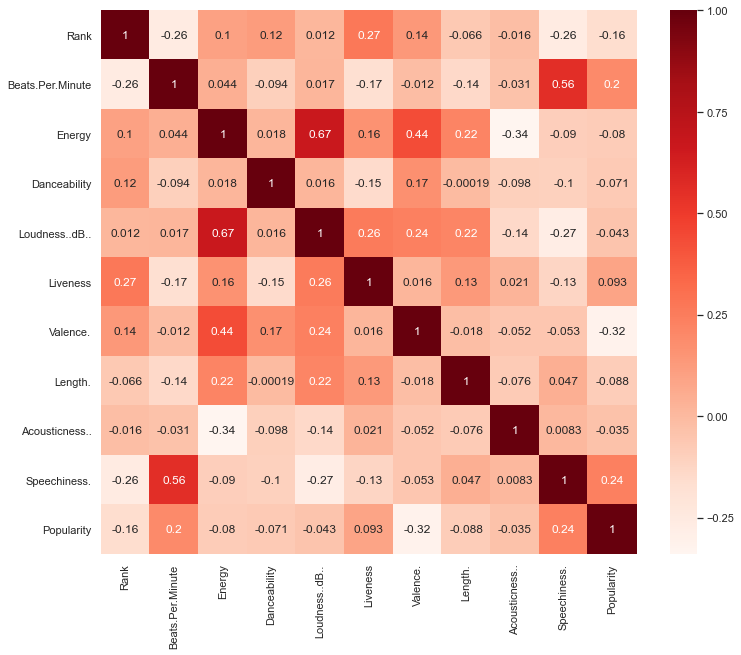

In [65]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot = True, cmap='Reds')

# Correlation of Significant positive Quantitative values

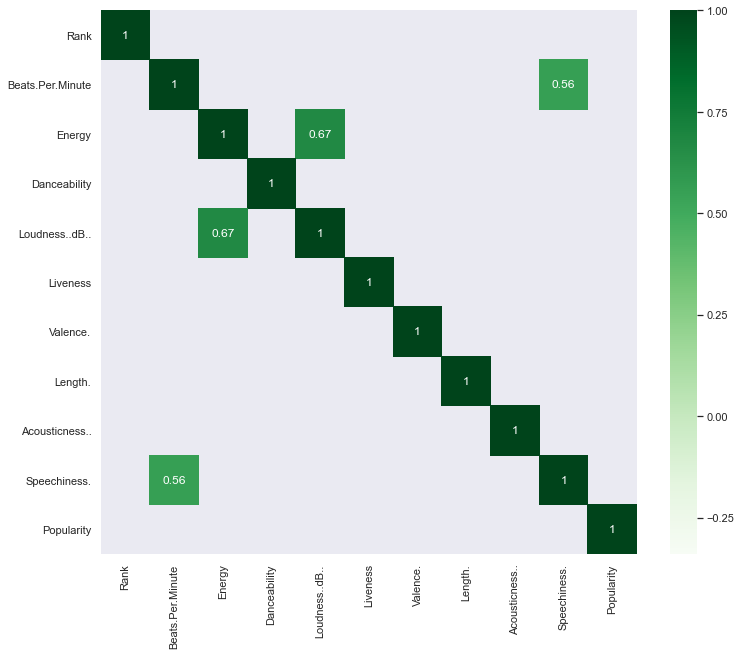

In [66]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(),annot = True, cmap='Greens', mask = (df.corr() <= 0.5))

# Correlation of Significant negative Quantitative values

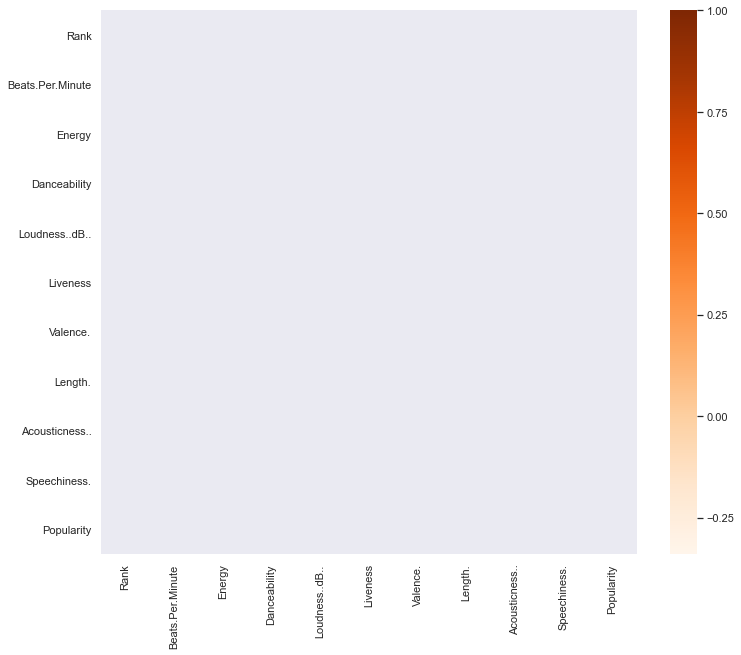

In [67]:
plt.figure(figsize = (12,10))

sns.heatmap(df.corr(),annot = True, cmap='Oranges', mask = (df.corr() >= -0.5))

# COMMON ARTISTS

## Common artists as the main artist

([<matplotlib.axis.XTick at 0x27c02ab70c8>,
 <a list of 5 Text major ticklabel objects>)

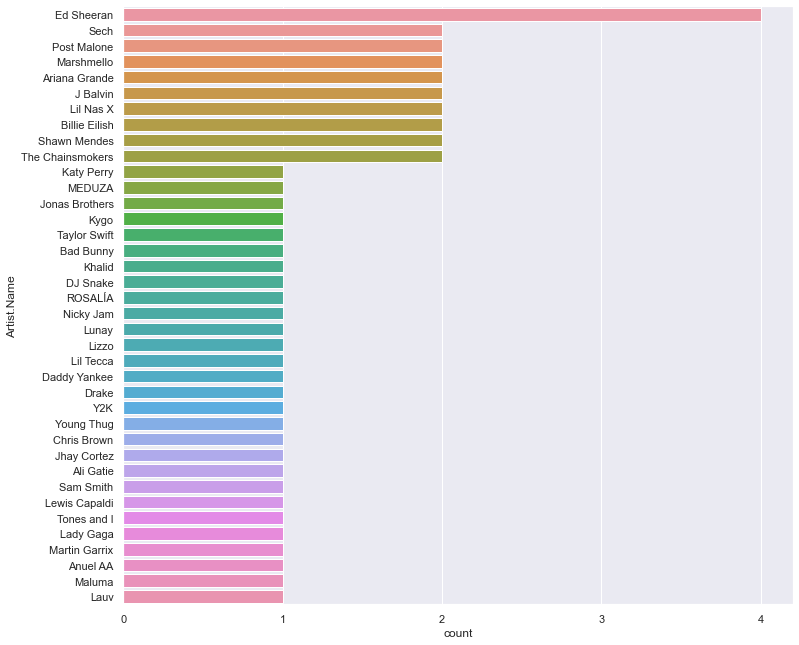

In [61]:
plt.figure(figsize = (12,11))
order = df['Artist.Name'].value_counts().index

ax = sns.countplot(data = df, y = 'Artist.Name', order = order)
ax.xlim=(0,3,1)

plt.xticks([0,1,2,3,4])

In [46]:
df[df['Artist.Name'] == 'Ed Sheeran']


,Rank,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
37,38,Antisocial (with Travis Scott),Ed Sheeran,pop,152,82,72,-5,36,91,162,13,5,87
49,50,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,95,79,75,-6,7,61,206,21,12,82


## Check for artist names in song title

The artist name  commonly comes after feat, ft or with

In [69]:
collab_artist = df[df['Track.Name'].str.contains("feat|ft|with|&")]["Track.Name"]

#Find out total count of songs with collaborating artists
print(collab_artist.shape)

for name in collab_artist: print(name)

(12,)
boyfriend (with Social House)
Beautiful People (feat. Khalid)
I Don't Care (with Justin Bieber)
Loco Contigo (feat. J. Balvin & Tyga)
Money In The Grave (Drake ft. Rick Ross)
No Guidance (feat. Drake)
bad guy (with Justin Bieber)
The London (feat. J. Cole & Travis Scott)
Summer Days (feat. Macklemore & Patrick Stump of Fall Out Boy)
Antisocial (with Travis Scott)
fuck, i'm lonely (with Anne-Marie) - from “13 Reasons Why: Season 3”
Cross Me (feat. Chance the Rapper & PnB Rock)


## Cleaning data to prepare for similarities using fuzzywuzzy

collaborating artists normally come after the brackets, "(". We extract the words after that bracket to make data more cleaner. As a result, we can determine whether there is the same artist in more than one song using fuzzywuzzy

In [72]:
#list stores the the str after the bracket i.e. collab artist
feat1 = []

for artists in collab_artist:
    
    if "(" in artists:
        #stores the str after the (
        feat1.append(artists.split("(")[1])
feat1

['with Social House)',
 'feat. Khalid)',
 'with Justin Bieber)',
 'feat. J. Balvin & Tyga)',
 'Drake ft. Rick Ross)',
 'feat. Drake)',
 'with Justin Bieber)',
 'feat. J. Cole & Travis Scott)',
 'feat. Macklemore & Patrick Stump of Fall Out Boy)',
 'with Travis Scott)',
 'with Anne-Marie) - from “13 Reasons Why: Season 3”',
 'feat. Chance the Rapper & PnB Rock)']

Checking for duplicate artists in song using fuzzywuzzy

In [74]:
for artist in feat1:

    matches = fuzzywuzzy.process.extract(str(artist), feat1, limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    for match in matches:

        close_matches = [matches[0] for matches in matches if matches[1] >= 40]
            
    if len(close_matches) > 2:
        print(close_matches)

    else:
        continue

['with Social House)', 'with Justin Bieber)', 'with Justin Bieber)', 'with Travis Scott)']
['feat. Khalid)', 'feat. J. Balvin & Tyga)', 'feat. J. Cole & Travis Scott)']
['with Justin Bieber)', 'with Justin Bieber)', 'with Social House)', 'with Travis Scott)']
['feat. J. Balvin & Tyga)', 'feat. J. Cole & Travis Scott)', 'feat. Drake)', 'feat. Khalid)', 'feat. Chance the Rapper & PnB Rock)']
['Drake ft. Rick Ross)', 'feat. Drake)', 'feat. Chance the Rapper & PnB Rock)']
['feat. Drake)', 'Drake ft. Rick Ross)', 'feat. J. Balvin & Tyga)']
['with Justin Bieber)', 'with Justin Bieber)', 'with Social House)', 'with Travis Scott)']
['feat. J. Cole & Travis Scott)', 'with Travis Scott)', 'feat. J. Balvin & Tyga)', 'feat. Chance the Rapper & PnB Rock)', 'feat. Khalid)']
['with Travis Scott)', 'feat. J. Cole & Travis Scott)', 'with Social House)', 'with Justin Bieber)', 'with Justin Bieber)']
['feat. Chance the Rapper & PnB Rock)', 'feat. J. Balvin & Tyga)', 'Drake ft. Rick Ross)', 'feat. J. Cole

### Determines count of artists in song title 

manually checked for the artists in array

In [75]:
ft_artists =["Social House",
"Khalid",
"Justin Bieber",
"J. Balvin", 
"Tyga",
"Drake",
"Rick Ross",
"J. Cole",   
"Travis Scott",
"Macklemore",
"Patrick Stump",
"Anne-Marie",
"Chance the Rapper",
"PnB Rock"    
]

#List stores collab artists appear in song 
ft_artists_cnt = []


for num in range(len(ft_artists)):
    #counter for artist apperance
    count = 0

#feat1 is the cleaned out song name with collab artist
    for artist in feat1:        
        
        if ft_artists[num] in artist:
            
            count+= 1
          
    ft_artists_cnt.append(int(count))

"""
Joins the artist list and the 
# of times artist appears in song together
in dictionary format
"""

ft_artists_dict = dict(zip(ft_artists, ft_artists_cnt)) 
ft_artists_dict

{'Social House': 1,
 'Khalid': 1,
 'Justin Bieber': 2,
 'J. Balvin': 1,
 'Tyga': 1,
 'Drake': 2,
 'Rick Ross': 1,
 'J. Cole': 1,
 'Travis Scott': 2,
 'Macklemore': 1,
 'Patrick Stump': 1,
 'Anne-Marie': 1,
 'Chance the Rapper': 1,
 'PnB Rock': 1}

## Total count of each collaborating artist

([<matplotlib.axis.XTick at 0x27c046b8d08>,
 <a list of 3 Text major ticklabel objects>)

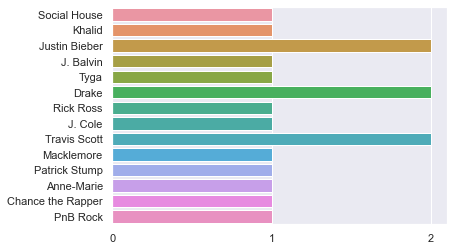

In [67]:
sns.barplot(y = list(ft_artists_dict.keys()), x = [ft_artists_dict[num] for num in ft_artists_dict])
plt.xticks([0,1,2])

## Joining of main artist with collaborating artist data

In [76]:
#Sort dataframe by main artist and their respective # of appearances
artist_cnt = df["Rank"].groupby(df["Artist.Name"]).count()
artist_cnt = pd.DataFrame(artist_cnt)


ft_artists_dict

"""
Nested loop check main artist data frame already has
collaborating artist in it. 
If so, then the number of appearances increases
If not, then the collab artist is added as a new artist to 
dataframe
"""


for num in ft_artists_dict.keys():
    
    for art in artist_cnt.index:
        
        #existing artist is increased of value
        if num == art:
            print(num)
            artist_cnt.loc[num] = artist_cnt.loc[num] + ft_artists_dict[num]
        
        #New artist is added as additional row
        else:
            artist_cnt.loc[num] = ft_artists_dict[num]
      
artist_cnt

Khalid
Drake


,Rank
Artist.Name,
Ali Gatie,1
Anuel AA,1
Ariana Grande,2
Bad Bunny,1
Billie Eilish,2
Chris Brown,1
DJ Snake,1
Daddy Yankee,1
Drake,2


## Total count of artist both as main and collab artist in playlist

([<matplotlib.axis.XTick at 0x27c0546d7c8>,
 <a list of 5 Text major ticklabel objects>)

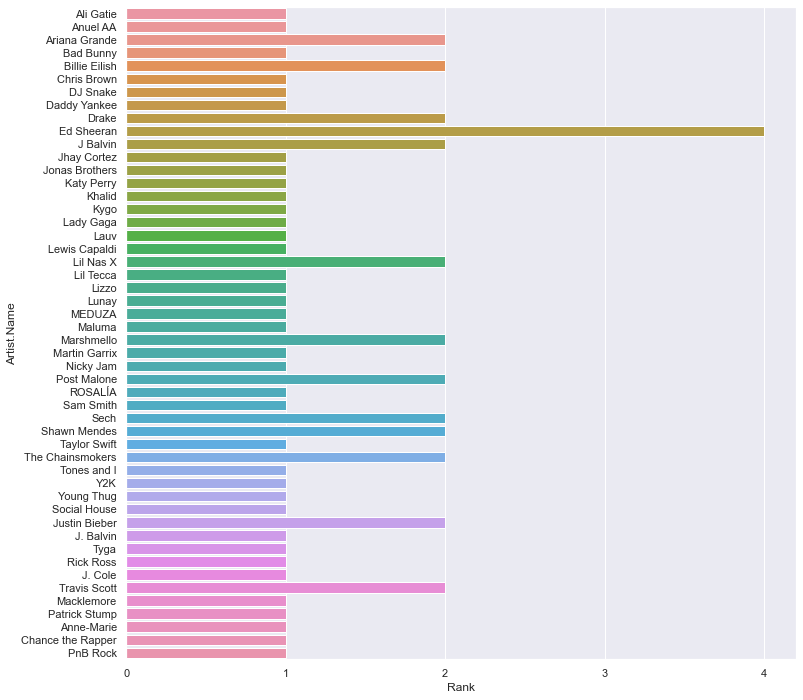

In [86]:
plt.figure(figsize = (12,12))
order = artist_cnt['Rank'].value_counts().index

sns.barplot(data = artist_cnt, x = "Rank", y = artist_cnt.index)

plt.xticks([0,1,2,3,4])

# References

https://stackoverflow.com/questions/68258626/unicodedecodeerror-utf-8-codec-cant-decode-byte-0xf1-in-position-5-invalid  
https://stackoverflow.com/questions/187455/counting-array-elements-in-python
https://medium.com/swlh/spotify-song-prediction-and-recommendation-system-b3bbc71398ad 
https://stackoverflow.com/questions/39359601/python-pandas-series-str-contains-whole-word
https://www.kaggle.com/leonardopena/top50spotify2019  
https://www.linkedin.com/pulse/how-spotify-recommender-system-works-daniel-roy-cfa/  